In [279]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [280]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [281]:
from IPython.display import HTML
style = "<style>svg{width:70% !important;height:70% !important;}</style>"
HTML(style)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [282]:
titanic_data= pd.read_csv('titanic.csv')

In [283]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [284]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived

In [285]:
X = X.fillna({'Age' : X.Age.median()})

In [286]:
X = pd.get_dummies(X)

In [287]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,35.0,1,0,53.1000,True,False,False,False,True
4,3,35.0,0,0,8.0500,False,True,False,False,True


In [288]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [289]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

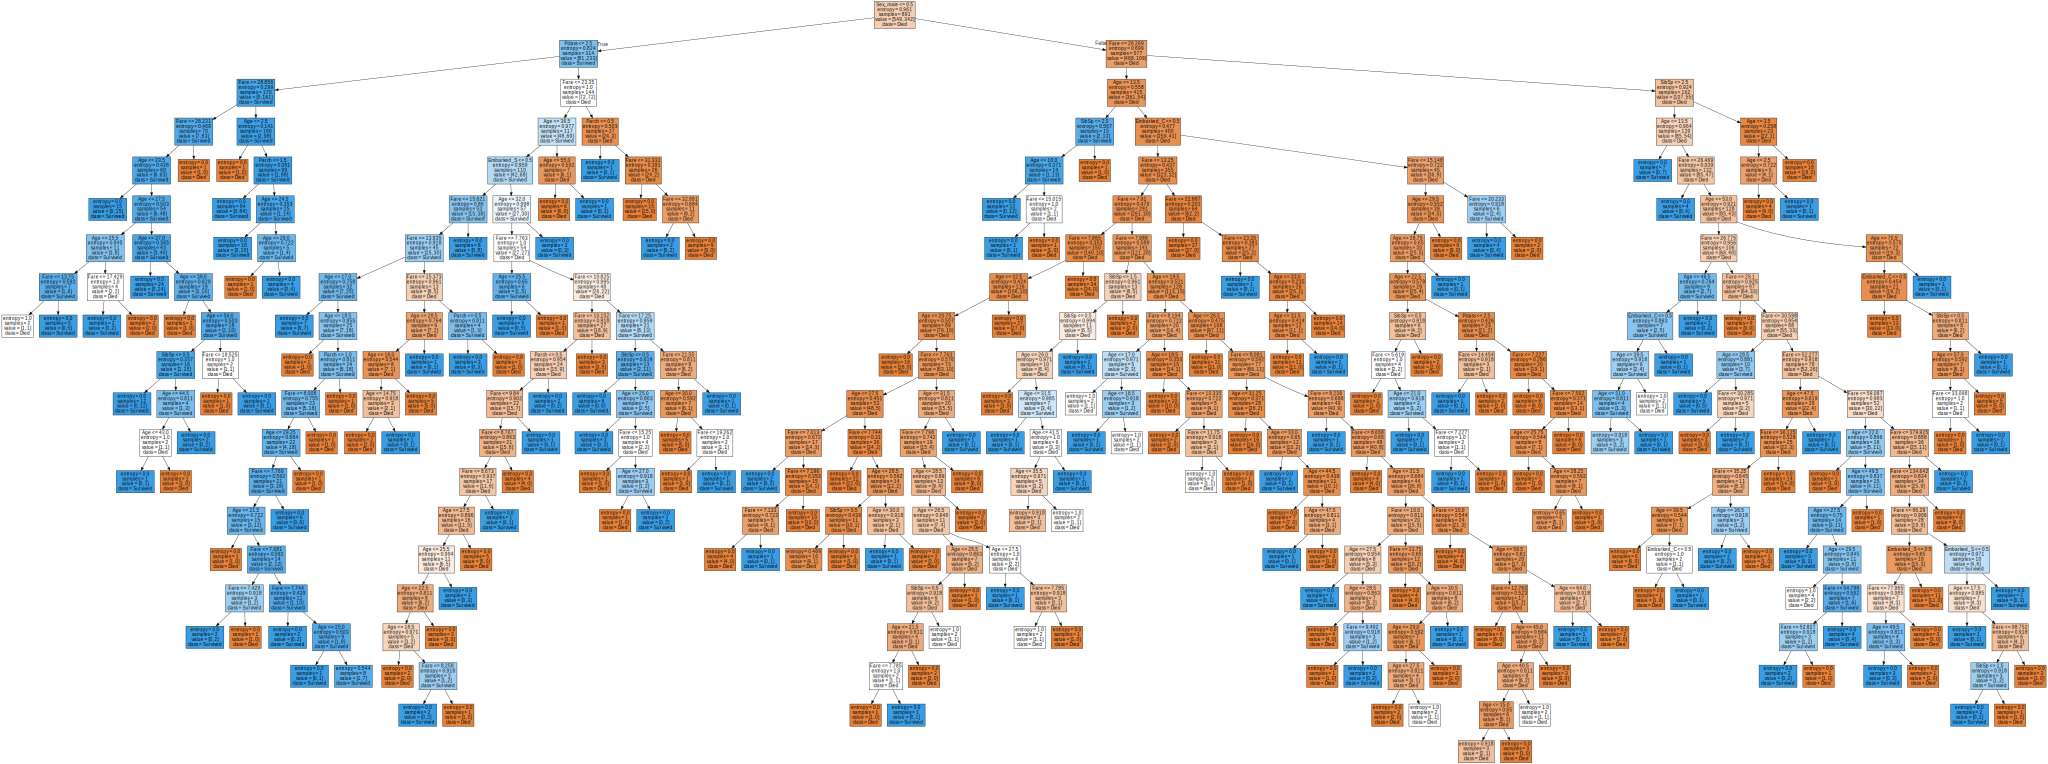

In [290]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X),
class_names=['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))

In [291]:
clf.score(X, y)

0.9797979797979798

In [227]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [192]:
max_depth_values = range(1, 100)

In [70]:
scores_data = pd.DataFrame() 

In [74]:
cross_val_scores_data = pd.DataFrame(columns=['max_depth', 'train_score', 'test_score', 'cross_val_score'])

In [78]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
   
    mean_cross_val_score = cross_val_score(clf, X_train, y_train , cv=5).mean()
   
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    break
temp_score_data

,max_depth,train_score,test_score,cross_val_score
0,1,1.0,1.0,1.0


In [287]:
scores_data.head()

,max_depth,train_score,test_score,mean_cross_val_score
0,1,1.0,1.0,<function cross_val_score at 0x000001EA9B3951C0>
1,2,1.0,1.0,<function cross_val_score at 0x000001EA9B3951C0>
2,3,1.0,1.0,<function cross_val_score at 0x000001EA9B3951C0>
3,4,1.0,1.0,<function cross_val_score at 0x000001EA9B3951C0>
4,5,1.0,1.0,<function cross_val_score at 0x000001EA9B3951C0>


In [288]:
scores_data_long = pd.melt(scores_data,
                           id_vars=['max_depth'],
                           value_vars=['train_score', 'test_score', 'cross_val_score'],
                           var_name = 'set_type',
                           value_name= 'score')

KeyError: "The following 'value_vars' are not present in the DataFrame: ['cross_val_score']"

In [289]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,1.0
1,2,train_score,1.0
2,3,train_score,1.0
3,4,train_score,1.0
4,5,train_score,1.0


<Axes: xlabel='max_depth', ylabel='score'>

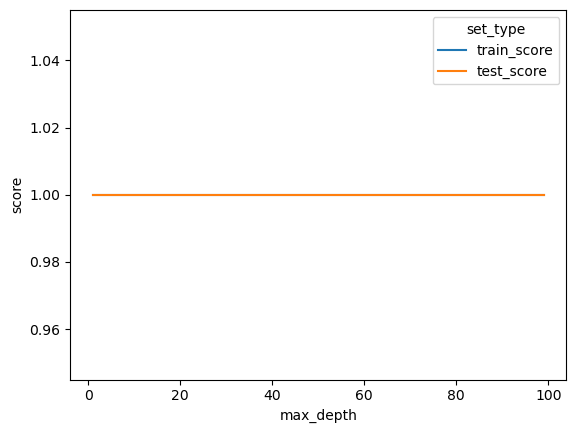

In [290]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)